<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ULckdresearch2023/data.csv")
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold,TimeDiff
0,1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:55,63.60,0,...,5.284,215.0,81.0,123.0,99.0,21.019,1,0,1,0.000000
1,3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:50,70.20,0,...,5.755,219.0,64.0,146.0,73.0,15.198,1,1,1,1.131507
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24,64.02,0,...,5.300,193.0,62.0,129.0,65.0,30.879,1,0,1,1.191781
3,0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42,48.54,0,...,5.562,205.0,69.0,139.0,76.0,36.916,1,0,1,1.016438
4,4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:55,80.47,0,...,5.500,198.0,74.0,129.0,60.0,28.684,1,1,1,1.208219


In [13]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation',
       'StartDTTM', 'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
  

In [14]:
data = [ 'Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP','Slopes',
    'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data_sl = df[data]

In [15]:
data_sl.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,Slopes,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,73,20.80,1.39,75.0,127.0,-7.158596,90,0,0,0,...,39.367,4.9248,194.24,91.0,5.284,215.0,81.0,123.0,99.0,21.019
1,74,20.27,1.38,64.0,105.0,5.550691,90,90,0,0,...,41.270,5.1634,251.46,86.0,5.755,219.0,64.0,146.0,73.0,15.198
2,75,20.72,1.38,76.0,138.0,-6.063710,100,100,34,0,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,30.879
3,76,20.27,1.36,66.0,134.0,-12.812245,35,0,1,35,...,39.053,4.3718,204.65,89.0,5.562,205.0,69.0,139.0,76.0,36.916
4,78,19.05,1.33,57.0,103.0,28.287500,100,0,15,0,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,28.684


In [16]:
def categorize_slope(slope):
    if slope < 0.75:
        return 'Better'  # Slope ลดลงน้อยกว่า 0.75 ml/min/year
    elif slope > 5:
        return 'Worse'  # Slope ลดลงมากกว่า 5 ml/min/year
    elif 0.75 <= slope <= 5:
        return 'Between'  # Slope อยู่ระหว่าง 0.75 และ 5 ml/min/year
    else:
        return 'Out of range'  # กรณีที่ไม่อยู่ในช่วงที่กำหนด

# Assuming df_selected is your DataFrame and 'Slopes' is a column in it
# Replace df_selected['Slopes'] with your actual column name if different
data_sl['Slopes_Category'] = data_sl['Slopes'].apply(categorize_slope)

<ipython-input-16-417db14117b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sl['Slopes_Category'] = data_sl['Slopes'].apply(categorize_slope)


In [17]:
data = [ 'Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
    'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data_cata = data_sl[data]

Feature Scaling (Standard Scaler)

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# สร้าง DataFrame ใหม่โดยเลือกคอลัมน์ที่ไม่ใช่ 'Slopes' และ 'Slopes_Category'
data_selected = data_sl.drop(columns=['Slopes', 'Slopes_Category'])

# ทำ StandardScaler() กับ DataFrame ที่เลือก
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

# สร้าง DataFrame ใหม่จากข้อมูลที่มีการปรับค่าแล้ว
data_slope = pd.DataFrame(scaled_data, columns=data_selected.columns)

# เพิ่มคอลัมน์ 'Slopes' และ 'Slopes_Category' จาก DataFrame เดิม
data_slope[['Slopes_Category']] = data_sl[['Slopes_Category']]

In [19]:
# Add additional columns without scaling
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'LabLocation', 'NATNL', 'Sex']]
data_slope = pd.concat([data_slope, additional_columns], axis=1)

In [20]:
data_slope.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Slopes_Category,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,3.686025,-1.158713,Better,0,1,0,0,1,0,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,1.640595,-1.258996,Worse,0,1,0,0,1,0,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,1.011232,-0.988847,Better,0,1,0,0,1,0,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,1.876606,-0.884842,Better,0,1,0,0,1,0,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.617880,-1.026662,Worse,0,1,0,0,1,0,1


In [24]:
data = [ 'Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP','L1-eGFR',
    'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data_st = df[data]

In [25]:
data_st.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,L1-eGFR,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,73,20.80,1.39,75.0,127.0,71.70,90,0,0,0,...,39.367,4.9248,194.24,91.0,5.284,215.0,81.0,123.0,99.0,21.019
1,74,20.27,1.38,64.0,105.0,63.60,90,90,0,0,...,41.270,5.1634,251.46,86.0,5.755,219.0,64.0,146.0,73.0,15.198
2,75,20.72,1.38,76.0,138.0,70.20,100,100,34,0,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,30.879
3,76,20.27,1.36,66.0,134.0,64.02,35,0,1,35,...,39.053,4.3718,204.65,89.0,5.562,205.0,69.0,139.0,76.0,36.916
4,78,19.05,1.33,57.0,103.0,48.54,100,0,15,0,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,28.684


In [26]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 30:
        return 'stage 3'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
#df_selected['eGFR_t1_Category'] = df_selected['eGFR_t1'].apply(categorize_eGFR)
data_st['eGFR_Category'] = data_st['L1-eGFR'].apply(categorize_eGFR)

<ipython-input-26-23538f50b0e6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st['eGFR_Category'] = data_st['L1-eGFR'].apply(categorize_eGFR)


In [27]:
data = [ 'Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
    'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data_cata = data_st[data]

Feature Scaling (Standard Scaler)

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# สร้าง DataFrame ใหม่โดยเลือกคอลัมน์ที่ไม่ใช่ 'Slopes' และ 'Slopes_Category'
data_selected = data_st.drop(columns=['L1-eGFR', 'eGFR_Category'])

# ทำ StandardScaler() กับ DataFrame ที่เลือก
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

# สร้าง DataFrame ใหม่จากข้อมูลที่มีการปรับค่าแล้ว
data_stage = pd.DataFrame(scaled_data, columns=data_selected.columns)

# เพิ่มคอลัมน์ 'Slopes' และ 'Slopes_Category' จาก DataFrame เดิม
data_stage[['eGFR_Category']] = data_st[['eGFR_Category']]

In [29]:
# Add additional columns without scaling
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'LabLocation', 'NATNL', 'Sex']]
data_stage = pd.concat([data_stage, additional_columns], axis=1)

In [30]:
data_stage.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,eGFR_Category,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,3.686025,-1.158713,stage 2,0,1,0,0,1,0,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,1.640595,-1.258996,stage 2,0,1,0,0,1,0,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,1.011232,-0.988847,stage 2,0,1,0,0,1,0,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,1.876606,-0.884842,stage 2,0,1,0,0,1,0,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.617880,-1.026662,stage 3,0,1,0,0,1,0,1


##TSNE

###slope

[Text(0.5, 1.0, 'Cluster by Slope T-SNE')]

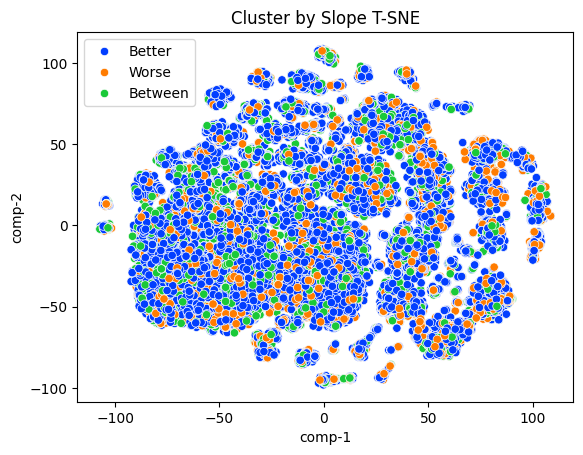

In [21]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Assuming stage_k5 is your DataFrame
y = data_slope['Slopes_Category']
X = data_slope.drop(['Slopes_Category'], axis=1)
tsne_slope = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = tsne_slope[:, 0]
df["comp-2"] = tsne_slope[:, 1]

# Use Seaborn for scatter plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 3),
                data=df).set(title="Cluster by Slope T-SNE")

###stage

[Text(0.5, 1.0, 'Cluster by Stage T-SNE')]

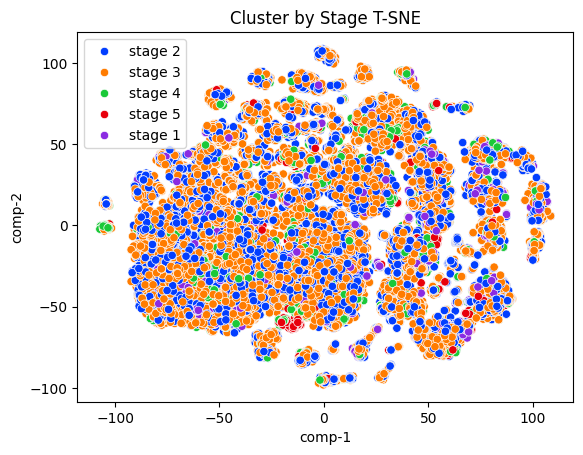

In [31]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Assuming stage_k5 is your DataFrame
y = data_stage['eGFR_Category']
X = data_stage.drop(['eGFR_Category'], axis=1)
tsne_stage= TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = tsne_stage[:, 0]
df["comp-2"] = tsne_stage[:, 1]

# Use Seaborn for scatter plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 5),
                data=df).set(title="Cluster by Stage T-SNE")